In [272]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [273]:
# visual
%config InlineBackend.figure_format = 'retina'
sns.set_context('notebook')

In [274]:
# read the file into a list for analysis
df = pd.read_excel('reviews.xlsx', sheet_name='Restaurant_Reviews')
review_list = []
for values in df.values:
    if not isinstance(values[0], float):
        review_list.append(values[0])

In [275]:
# analyse each element of list and fill arrays with positive and negative sentiments seperately.
sentiment_polarity = []
sentiment_review = []
    
for sen in review_list:
    if sia.polarity_scores(sen)["pos"] > sia.polarity_scores(sen)["neg"]:
        sentiment_polarity.append(sia.polarity_scores(sen)["pos"])
    else:
        sentiment_polarity.append(sia.polarity_scores(sen)["neg"] * -1)
    sentiment_review.append(sen)


In [276]:
# create a new csv with the string + compound value
df_out = pd.DataFrame({"review": sentiment_review,
                      "sentiment_polarity": sentiment_polarity })
df_out.to_csv('out.csv', index=False)  

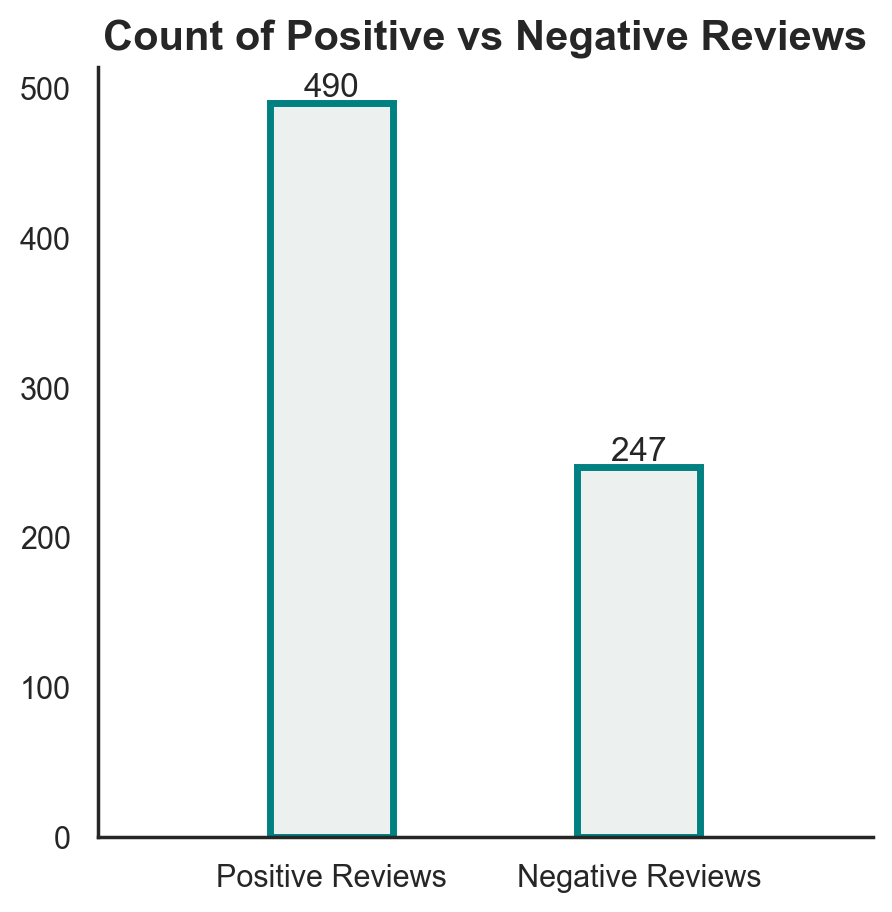

In [285]:
# count amount of positive vs negative reviews
count_pos = 0
count_neg = 0
for sentiment in sentiment_polarity:
    if sentiment > 0:
        count_pos += 1
    elif sentiment < 0:
        count_neg += 1
        
sns.set_theme(rc={'figure.figsize':(5,5), 'patch.linewidth': 1.0},style="white", palette="light:#5A9")
        
bar = sns.barplot(y=[count_pos,count_neg], 
                x=["Positive Reviews","Negative Reviews"],
                width=0.4,
                linewidth = 2.5,
                edgecolor = "teal")


for i in bar.containers:
    bar.bar_label(i)
bar.set_title("Count of Positive vs Negative Reviews",fontsize=15,fontweight= 'bold')
sns.color_palette("hls", 8)
plt.margins(x=0.4)
sns.despine()



In [286]:
# print 5 highest and 5 lowest values
table_review = []
table_sentiment = []

for i in range(5):
    # set latest highest and lowest from sentiment_polarity
    highest_pos = sentiment_review[sentiment_polarity.index(max(sentiment_polarity))]
    lowest_pos = sentiment_review[sentiment_polarity.index(min(sentiment_polarity))]
    
    # store for table
    table_review.append(highest_pos)
    table_sentiment.append(max(sentiment_polarity))
    
    table_review.append(lowest_pos)
    table_sentiment.append(min(sentiment_polarity))

    # remove old highest and lowest
    sentiment_polarity.pop(sentiment_polarity.index(max(sentiment_polarity)))
    sentiment_review.pop(sentiment_polarity.index(max(sentiment_polarity)))
    sentiment_polarity.pop(sentiment_polarity.index(min(sentiment_polarity)))
    sentiment_review.pop(sentiment_polarity.index(min(sentiment_polarity)))

In [287]:
# creating a table to display the highest rated positive and negative reviews
table_data = []
for i in range(len(table_review)):
    table_data.append([table_review[i],table_sentiment[i]])
    
col_names = ["Review", "Sentiment Polarity"]

print(tabulate(table_data, headers=col_names))

Review                                                            Sentiment Polarity
--------------------------------------------------------------  --------------------
Good Service-check!                                                            0.761
I was VERY disappointed!!                                                     -0.702
After two I felt disgusting.                                                   0.761
Hell no will I go back                                                        -0.694
Cute, quaint, simple, honest.                                                  0.759
Anyway, this FS restaurant has a wonderful breakfast/lunch.                   -0.693
Check it out.                                                                  0.744
Worst martini ever!                                                           -0.687
The decor is nice, and the piano music soundtrack is pleasant.                 0.744
Worst Thai ever.                                                 

In [288]:
for review in sentiment_review:
    if "management" in review:
        print(review)

The management is rude.
Terrible management.
We recently witnessed her poor quality of management towards other guests as well.
Best of luck to the rude and non-customer service focused new management.
I have watched their prices inflate, portions get smaller and management attitudes grow rapidly!
